In [260]:
def build_download_url(
    api_key,
    ticker,
    start_date,
    end_date,
    sampling_interval,
    after_hours
):
    """Documentation: https://www.tiingo.com/documentation/iex"""

    start_date_str= start_date.strftime("%Y-%m-%d")
    end_date_str= end_date.strftime("%Y-%m-%d")
    after_hours_str= "true" if after_hours else "false"

    return (
        f"https://api.tiingo.com/iex/{ticker}/prices?"
        f"token={api_key}&"
        f"startDate={start_date_str}&"
        f"endDate={end_date_str}&"
        f"resampleFreq={sampling_interval}min&"
        f"afterHours={after_hours_str}&"
        f"format=csv"
    )

In [261]:
from datetime import datetime, timedelta
import requests

def download_ticker(
    api_key: str,
    ticker: str,
    start_date : datetime,
    end_date : datetime,
    sampling_interval: int,
    after_hours: bool,
):
    url = build_download_url(
        api_key, 
        ticker, 
        start_date, 
        end_date, 
        sampling_interval, 
        after_hours)
    
    print(
        f"Retrieving {ticker} from {start_date} to {end_date} on {sampling_interval}m - {url}"
    )

    return make_request_with_retry(url)


def make_request_with_retry(url, retries=5, delay=1):
    headers = {"Content-Type": "application/json"}
    for attempt in range(retries + 1):
        try:
            response = requests.get(url, headers)
            response.raise_for_status()  # Raise an exception for non-2xx responses
            return response.text
        except requests.RequestException as e:
            if response.status_code == 404:
                print(f"404 error: {e}")
                return None
            if attempt < retries:
                print(f"Transient error occurred. Retrying in {delay} seconds...")
                time.sleep(delay)
                delay *= 2  # Exponential backoff
            else:
                print(f"Error: {e}")
                raise

In [262]:
import matplotlib.pyplot as plt
import importlib

import classes_calc

# Reload the module when changes are made
importlib.reload(classes_calc)

<module 'classes_calc' from 'C:\\Users\\User\\AAAMio\\Projects\\PyTorch\\riga_stock_nn\\classes_calc.py'>

In [263]:
# Ginkgo Bioworks went public on the New York Stock Exchange via a SPAC merger on September 17, 2021
csv_data2021= download_ticker("55daa0bf5f29eb5b33b56c9f996afe5eb2dae346", "DNA", datetime(2021, 1, 1), datetime(2022,1,1), 15, False)
csv_data2022= download_ticker("55daa0bf5f29eb5b33b56c9f996afe5eb2dae346", "DNA", datetime(2022, 1, 1), datetime(2023,1,1), 15, False)
csv_data2023= download_ticker("55daa0bf5f29eb5b33b56c9f996afe5eb2dae346", "DNA", datetime(2023, 1, 1), datetime(2023,11,11), 15, False)

Retrieving DNA from 2021-01-01 00:00:00 to 2022-01-01 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=55daa0bf5f29eb5b33b56c9f996afe5eb2dae346&startDate=2021-01-01&endDate=2022-01-01&resampleFreq=15min&afterHours=false&format=csv
Retrieving DNA from 2022-01-01 00:00:00 to 2023-01-01 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=55daa0bf5f29eb5b33b56c9f996afe5eb2dae346&startDate=2022-01-01&endDate=2023-01-01&resampleFreq=15min&afterHours=false&format=csv
Retrieving DNA from 2023-01-01 00:00:00 to 2023-11-11 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=55daa0bf5f29eb5b33b56c9f996afe5eb2dae346&startDate=2023-01-01&endDate=2023-11-11&resampleFreq=15min&afterHours=false&format=csv


In [264]:
csv_data2023

'date,close,high,low,open,volume\n2023-01-03 09:30:00-05:00,1.76,1.795,1.7,1.705,9975.0\n2023-01-03 09:45:00-05:00,1.705,1.765,1.695,1.765,20569.0\n2023-01-03 10:00:00-05:00,1.645,1.71,1.635,1.705,17890.0\n2023-01-03 10:15:00-05:00,1.63,1.645,1.615,1.645,10880.0\n2023-01-03 10:30:00-05:00,1.605,1.625,1.6,1.625,19942.0\n2023-01-03 10:45:00-05:00,1.63,1.63,1.605,1.605,8423.0\n2023-01-03 11:00:00-05:00,1.605,1.625,1.605,1.625,13612.0\n2023-01-03 11:15:00-05:00,1.595,1.605,1.595,1.605,4284.0\n2023-01-03 11:30:00-05:00,1.59,1.595,1.58,1.595,9655.0\n2023-01-03 11:45:00-05:00,1.585,1.59,1.575,1.59,2028.0\n2023-01-03 12:00:00-05:00,1.585,1.585,1.58,1.585,836.0\n2023-01-03 12:15:00-05:00,1.575,1.585,1.555,1.585,10690.0\n2023-01-03 12:30:00-05:00,1.565,1.58,1.565,1.575,6347.0\n2023-01-03 12:45:00-05:00,1.565,1.565,1.555,1.565,9972.0\n2023-01-03 13:00:00-05:00,1.56,1.565,1.56,1.565,3375.0\n2023-01-03 13:15:00-05:00,1.56,1.565,1.55,1.565,15886.0\n2023-01-03 13:30:00-05:00,1.545,1.565,1.535,1.565,5

In [265]:
import io
import pandas as pd

df2021 = pd.read_csv(io.StringIO(csv_data2021))
df2022 = pd.read_csv(io.StringIO(csv_data2022))
df2023 = pd.read_csv(io.StringIO(csv_data2023))
df = pd.concat([df2021, df2022, df2023], axis=0, ignore_index=True)


In [266]:
close_list = df['close'].astype(float).tolist()

print(f"df First: {df[:10]}")
print(f"close First: {close_list[:10]}")
print(f"df Last: {df[-10:]}")
print(f"close Last: {close_list[-10:]}")

df First:                         date  close   high    low   open  volume
0  2021-04-19 10:45:00-04:00  10.22  10.22  10.22  10.22   100.0
1  2021-04-19 11:00:00-04:00  10.18  10.18  10.11  10.11   400.0
2  2021-04-19 11:15:00-04:00  10.17  10.18  10.17  10.18   580.0
3  2021-04-19 11:30:00-04:00  10.17  10.17  10.17  10.17     0.0
4  2021-04-19 11:45:00-04:00  10.17  10.17  10.17  10.17     0.0
5  2021-04-19 12:00:00-04:00  10.17  10.17  10.17  10.17     0.0
6  2021-04-19 12:15:00-04:00  10.17  10.17  10.17  10.17     0.0
7  2021-04-19 12:30:00-04:00  10.17  10.17  10.17  10.17     0.0
8  2021-04-19 12:45:00-04:00  10.17  10.17  10.17  10.17     0.0
9  2021-04-19 13:00:00-04:00  10.17  10.17  10.17  10.17     0.0
close First: [10.22, 10.18, 10.17, 10.17, 10.17, 10.17, 10.17, 10.17, 10.17, 10.17]
df Last:                             date  close   high    low   open   volume
17379  2023-11-10 13:30:00-05:00  1.255  1.255  1.255  1.255   2524.0
17380  2023-11-10 13:45:00-05:00  1.255  1

In [267]:
classes_window= 52
down_pcts= [7]
up_pcts= [7]
calculator = classes_calc.ClassesCalc(classes_window, down_pcts, up_pcts)

In [268]:
classes= calculator.calculate(close_list)
print(classes[-classes_window-1:-classes_window+1])

[0, nan]


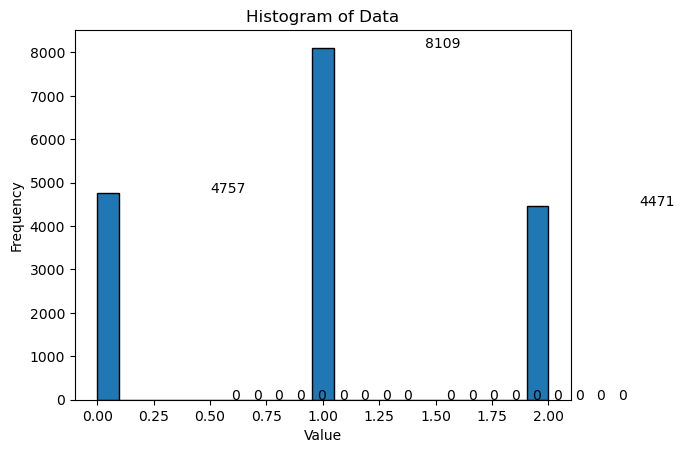

In [269]:
import matplotlib.pyplot as plt

# Create a histogram
hist_values, bin_edges, _ = plt.hist(classes, bins=21, edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display frequency on top of each bar
for value, edge in zip(hist_values, bin_edges[:-1]):
    plt.text(edge + 0.5, value + 0.1, str(int(value)), color='black')
    
# Show the histogram
plt.show()


In [270]:
from collections import Counter

@staticmethod
def display_frequency_numbers(classes):
    # Calculate the frequency of each element
    frequency_dict = Counter(classes)
    
    # Print the result
    num_ticks= len(classes)
    print(f"Total: {num_ticks}")
    for element, frequency in frequency_dict.items():
        percent=0
        position= element - len(down_pcts)
        if position < 0:
            percent= -1 * down_pcts[-1 * position - 1] 
        elif position > 0:
            percent= up_pcts[position - 1]
            
        print(f"{(frequency/num_ticks*100):>6.2f}% {frequency:>6} times {percent:>3}% change ({element})")

display_frequency_numbers(classes)

Total: 17389
 46.63%   8109 times   0% change (1)
 27.36%   4757 times  -7% change (0)
 25.71%   4471 times   7% change (2)
  0.30%     52 times   0% change (nan)


In [271]:
import importlib

import signals_calc

# Reload the module when changes are made
importlib.reload(signals_calc)

signal_windows= [2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]
signals_calculator = signals_calc.SignalsCalc(signal_windows)

windows_rolling_avg = signals_calculator.calculate(close_list)
windows_rolling_avg

[[nan,
  10.2,
  10.174999999999999,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.119999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.077499999999997,
  10.077499999999997,
  10.069999999999997,
  10.059999999999997,
  10.049999999999997,
  10.049999999999997,
  10.049999999999997,
  10.069999999999997,
  10.089999999999996,
  10.114999999999997,
  10.109999999999996,
  10.079999999999995,
  10.079999999999995,
  10.079999999999995,
  10.079999999999995,
  10.079999999999995,
  10.104999999999995,
  10.129999999999995,
  10.099999999999994,
  10.069999999999993,
  10.069999999999993,
  10.094999999999

In [272]:
print(len(close_list))
print(len(windows_rolling_avg[len(signal_windows)-1]))


17389
17389


In [273]:
from typing import List

@staticmethod
def calculate_price_proportions(prices: List[float], averages_list: List[List[float]]) -> List[List[float]]:
    list_of_list_proportions= []
    for averages in averages_list:
        list_proportions= []
        for idx in range(len(averages)):
            list_proportions.append((prices[idx]-averages[idx])/prices[idx])

        list_of_list_proportions.append(list_proportions)

    return list_of_list_proportions

In [274]:
proportions= calculate_price_proportions(close_list, windows_rolling_avg)

In [275]:
print(close_list[-10:])
print(windows_rolling_avg[0][-10:])
print(proportions[0][-10:])
current_sum = sum(close_list[-2:])/2
classes_len= len(classes)
signal_windows_len= len(signal_windows)

print(f"Signal window last: {signal_windows[-1]} len: {signal_windows_len}")
print(f"Classes last non-nan: {classes[-classes_window-1:-classes_window+1]} len: {classes_len}")
print(f"Proportions first non-nan: {proportions[signal_windows_len-1][signal_windows[-1]-2:signal_windows[-1]]} len: {len(proportions[signal_windows_len-1])}")
print(f"Proportions {signal_windows[0]} Min: {min(proportions[0][signal_windows[0]-1:-classes_window-1])} Max: {max(proportions[0][signal_windows[0]-1:-classes_window])}")
print(f"Proportions {signal_windows[-1]} Min: {min(proportions[-1][signal_windows[-1]-1:-classes_window-1])} Max: {max(proportions[-1][signal_windows[-1]-1:-classes_window])}")

[1.255, 1.255, 1.255, 1.265, 1.285, 1.285, 1.265, 1.265, 1.265, 1.275]
[1.252500000000032, 1.2550000000000319, 1.2550000000000319, 1.2600000000000318, 1.2750000000000319, 1.285000000000032, 1.2750000000000319, 1.2650000000000319, 1.2650000000000319, 1.270000000000032]
[0.00199203187248444, -2.5477627975461762e-14, -2.5477627975461762e-14, 0.003952569169935289, 0.007782101167290299, -2.4882819540236975e-14, -0.007905138339946232, -2.5276223801742697e-14, -2.5276223801742697e-14, 0.003921568627425819]
Signal window last: 2584 len: 16
Classes last non-nan: [0, nan] len: 17389
Proportions first non-nan: [nan, 0.0010667620069820748] len: 17389
Proportions 2 Min: -0.08264462809917836 Max: 0.08449946178686112
Proportions 2584 Min: -2.162611895734038 Max: 0.40492674483802216


In [276]:
# Cutting from first non-nan in the signal_windows[-1] to last non-nan in the classes
targets = classes[signal_windows[-1]-1:-classes_window]
inputs = []
for proportion in proportions:
    proportion_cut=proportion[signal_windows[-1]-1:-classes_window]
    print(proportion_cut[:2])
    inputs.append(proportion_cut)

print(f"First target: {targets[0]} and last target: {targets[-1]}")
print(f"Classes: {len(classes)} after cut to targets: {len(targets)}")
print(f"Inputs {len(inputs[len(signal_windows)-1])}")
print(f"Distinct targets: {list(set(targets))}")


[-1.067950003647445e-15, -1.067950003647445e-15]
[3.3818416782169095e-15, 3.3818416782169095e-15]
[-0.00020040080160540924, -2.13590000729489e-15]
[-0.0005010020040093402, -0.00037575150300745016]
[-0.0006551564667889754, -0.0005780792354032516]
[-0.00019085790629083202, -0.00021471514457683006]
[0.00020629494282539654, 0.00017682423670730476]
[0.0005465476407353424, 0.0005192202586986375]
[0.0007205422080100994, 0.0007036545000097945]
[0.0009219828545974838, 0.0009150244934305934]
[0.0010708111502064873, 0.0010557595878543562]
[0.001008648596935527, 0.0010113064325005213]
[0.0002004008015998915, 0.00018643845066879528]
[0.003177073498579978, 0.0031745354945070295]
[0.003088518928908605, 0.0030878914999742354]
[0.0010667620069820748, 0.0010760685457564339]
First target: 1 and last target: 0
Classes: 17389 after cut to targets: 14754
Inputs 14754
Distinct targets: [0, 1, 2]


In [277]:
@staticmethod
def get_indexes_value(lst: List[int], value: int, n: int) -> List[int]:
    '''
    Given a list of integers of length M randomly get N positions where it contain value V
    '''
    positions = [i for i, x in enumerate(lst) if x == value]

    # Randomly select N positions
    selected_positions = random.sample(positions, min(n, len(positions)))

    return selected_positions


def remove_indexes(lst: List[int], indexes: List[int]) -> List[int]:
    '''
    Given a list of integers 'r' that are indexes on list 'a' create a new list 'b' removing from 'a' the indexes in 'r' 
    '''
    indexes_set = set(indexes)
    # Create a new list 'b' without the elements at the specified indices
    result = [lst[i] for i in range(len(lst)) if i not in indexes_set]
    return result

@staticmethod
def convert_binary(lst: List[int], value_one: int) -> List[int]:
    result = [1 if x == value_one else 0 for x in lst]
    return result

display_frequency_numbers(targets)

targets_frequency = Counter(targets)
print(f"Removing 0: {targets_frequency[0] - targets_frequency[2] + targets_frequency[2] //2}")
print(f"Removing 1: {targets_frequency[1] - targets_frequency[2] + targets_frequency[2] //2}")


Total: 14754
 37.45%   5526 times   0% change (1)
 32.24%   4757 times  -7% change (0)
 30.30%   4471 times   7% change (2)
Removing 0: 2521
Removing 1: 3290


In [278]:
import random

indexes_remove0 = get_indexes_value(targets, 0, targets_frequency[0] - targets_frequency[2] + targets_frequency[2] //2)
indexes_remove1 = get_indexes_value(targets, 1, targets_frequency[1] - targets_frequency[2] + targets_frequency[2] //2)
indexes_remove= indexes_remove0 + indexes_remove1
targets_clean= remove_indexes(targets, indexes_remove)

display_frequency_numbers(targets_clean)
print(f"Targets len: {len(targets)} Targets clean: {len(targets_clean)} Difference: {len(targets)-len(targets_clean)}")

inputs_clean = [remove_indexes(input, indexes_remove) for input in inputs]    

targets_binary= convert_binary(targets_clean, 2)
print(f"Targets binary len: {len(targets_binary)} Input clean[0]: {len(inputs_clean[0])} Input clean[-1]: {len(inputs_clean[-1])}")
print(f"targets_clean index 2(First:{targets_clean.index(2)},Last:-{targets_clean[::-1].index(2)}) targets_binary index True(First:{targets_binary.index(True)},Last:-{targets_binary[::-1].index(True)})")

Total: 8943
 25.00%   2236 times   0% change (1)
 25.00%   2236 times  -7% change (0)
 49.99%   4471 times   7% change (2)
Targets len: 14754 Targets clean: 8943 Difference: 5811
Targets binary len: 8943 Input clean[0]: 8943 Input clean[-1]: 8943
targets_clean index 2(First:64,Last:-25) targets_binary index True(First:64,Last:-25)


In [279]:
import torch

inputs_tensor = torch.Tensor(inputs_clean)
inputs_tensor = inputs_tensor.T
targets_tensor = torch.Tensor(targets_binary)
print(f"inputs_clean len0 x len1: {len(inputs_clean)} x {len(inputs_clean[0])} -> inputs_tensor.shape: {inputs_tensor.shape}")
print(f"targets_binary.shape: {len(targets_binary)} -> targets_tensor.shape: {targets_tensor.shape}")
print(f"inputs_tensor: {inputs_tensor}")
print(f"targets_tensor: {targets_tensor}")

inputs_clean len0 x len1: 16 x 8943 -> inputs_tensor.shape: torch.Size([8943, 16])
targets_binary.shape: 8943 -> targets_tensor.shape: torch.Size([8943])
inputs_tensor: tensor([[-1.0680e-15,  3.3818e-15, -2.0040e-04,  ...,  3.1771e-03,
          3.0885e-03,  1.0668e-03],
        [-1.0680e-15,  3.3818e-15, -2.1359e-15,  ...,  3.1695e-03,
          3.0882e-03,  1.0912e-03],
        [-1.0680e-15,  3.3818e-15, -2.1359e-15,  ...,  3.1644e-03,
          3.0926e-03,  1.1059e-03],
        ...,
        [-2.1310e-14, -1.1186e-03, -6.7114e-04,  ..., -1.0374e-01,
         -1.8539e-01, -2.5275e-01],
        [-1.6835e-03, -2.2447e-03, -3.3670e-03,  ..., -1.0716e-01,
         -1.8923e-01, -2.5690e-01],
        [-2.1382e-14, -1.1223e-03, -2.6936e-03,  ..., -1.0686e-01,
         -1.8908e-01, -2.5684e-01]])
targets_tensor: tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [280]:
#Shuffle tensors
torch.manual_seed(42) 
inputs_tensor_shuffle = inputs_tensor[torch.randperm(inputs_tensor.size(0))]

torch.manual_seed(42) 
targets_tensor_shuffle = targets_tensor[torch.randperm(len(targets_tensor))]

print(f"inputs_tensor.size(0): {inputs_tensor.size(0)}")
print(f"inputs_tensor.shape: {inputs_tensor.shape} -> inputs_tensor_shuffle.shape: {inputs_tensor_shuffle.shape}")
print(f"targets_tensor.shape: {targets_tensor.shape} -> targets_tensor_shuffle.shape: {targets_tensor_shuffle.shape}")

inputs_tensor.size(0): 8943
inputs_tensor.shape: torch.Size([8943, 16]) -> inputs_tensor_shuffle.shape: torch.Size([8943, 16])
targets_tensor.shape: torch.Size([8943]) -> targets_tensor_shuffle.shape: torch.Size([8943])


In [281]:
train_test_split= int(0.8 * len(targets_tensor))
inputs_tensor_train, targets_tensor_train= inputs_tensor_shuffle[:train_test_split], targets_tensor_shuffle[:train_test_split]
inputs_tensor_test, targets_tensor_test= inputs_tensor_shuffle[train_test_split:], targets_tensor_shuffle[train_test_split:]

In [282]:
#All values represented after split
print(f"Distinct targets_tensor_train: {list(set(targets_tensor_train.tolist()))}")
print(f"Distinct targets_tensor_test: {list(set(targets_tensor_test.tolist()))}")

Distinct targets_tensor_train: [0.0, 1.0]
Distinct targets_tensor_test: [0.0, 1.0]


In [283]:
from typing import Tuple
import torch
from torch.utils.data import Dataset

class StockDataset(Dataset):
    def __init__(
        self,
        inputs,
        targets):
        
        self.inputs= inputs
        self.targets= targets

    def __len__(self) -> int:
        return len(self.targets)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        return self.inputs[index], self.targets[index]


In [284]:
from torch.utils.data import DataLoader

train_dataset= StockDataset(
  inputs_tensor_train,
  targets_tensor_train
)

print(f"train_dataset: {train_dataset[0]}")

test_dataset= StockDataset(
  inputs_tensor_test,
  targets_tensor_test
)

print(f"test_dataset: {test_dataset[0]}")

BATCH_SIZE= 32
train_dataloader= DataLoader(
  dataset=train_dataset,
  batch_size=BATCH_SIZE,
  shuffle=False
)

test_dataloader= DataLoader(
  dataset=test_dataset,
  batch_size=BATCH_SIZE,
  shuffle=False
)

train_input0, train_target0= next(iter(train_dataloader))
print(f"train_input0: {train_input0} train_target0: {train_target0}")
test_input0, test_target0= next(iter(test_dataloader))
print(f"test_input0: {train_input0} test_target0: {test_target0}")


train_dataset: (tensor([-0.0041, -0.0095, -0.0033,  0.0061,  0.0126,  0.0126,  0.0056,  0.0022,
        -0.0078, -0.0268, -0.0355, -0.0467, -0.0840, -0.2256, -0.3066, -0.4123]), tensor(1.))
test_dataset: (tensor([-3.4106e-03, -3.1833e-03, -5.4570e-04,  3.2401e-03,  1.2278e-02,
         1.6891e-02, -3.8520e-03, -1.9645e-02, -3.0274e-02, -1.4590e-03,
         2.3696e-02, -3.8460e-02,  1.1419e-02,  3.8564e-03, -1.6828e-01,
        -6.3475e-01]), tensor(1.))
train_input0: tensor([[-4.0816e-03, -9.5238e-03, -3.2653e-03,  6.1224e-03,  1.2559e-02,
          1.2634e-02,  5.6423e-03,  2.2263e-03, -7.8422e-03, -2.6842e-02,
         -3.5508e-02, -4.6749e-02, -8.4015e-02, -2.2560e-01, -3.0658e-01,
         -4.1234e-01],
        [-5.8366e-03, -1.2970e-03,  1.0117e-02,  1.7996e-02,  2.0353e-02,
          1.3711e-02,  2.2889e-03, -7.7821e-03, -1.7182e-02, -3.5695e-02,
         -5.9585e-02, -1.3597e-01, -2.3183e-01, -3.1819e-01, -3.0868e-01,
         -4.8168e-01],
        [ 1.7094e-03,  2.2792e-03,  3

In [285]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [288]:
import torch
from torch import nn

class StockModelBinaryV0(nn.Module):
  def __init__(self, input_features, hidden_units):
    """Initializes multi-class classification model"""
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units*16),
      nn.LeakyReLU(negative_slope=0.1),
      nn.Linear(in_features=hidden_units*16, out_features=hidden_units*8),
      nn.LeakyReLU(negative_slope=0.1),
      nn.Linear(in_features=hidden_units*8, out_features=hidden_units*4),
      nn.LeakyReLU(negative_slope=0.1),
      nn.Linear(in_features=hidden_units*4, out_features=hidden_units),
      nn.LeakyReLU(negative_slope=0.1),
      nn.Linear(in_features=hidden_units, out_features=1)
    )

  def forward(self, x):
    # print("forward x: ",", ".join([str(num) for num in x.tolist()]))
    # Layers are defined inside the Sequencial NN and will be applied here.
    return self.linear_layer_stack(x)

# Create an instance of the model
model_0 = StockModelBinaryV0(
  input_features=len(signal_windows),
  hidden_units=12).to(device)


In [296]:
len(signal_windows)

16

In [312]:
from torchmetrics import Accuracy

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_fn= Accuracy(task='binary').to(device)

In [ ]:
epochs=100

for epoch in range(epochs):
    train_loss, train_accuracy= 0, 0

    # Training
    model_0.train()

    for batch, (X, y) in enumerate(train_dataloader):
        X= X.to(device)
        y= y.to(device)
        
        # Forward pass
        y_logits= model_0(X).squeeze()
        
        # turn logits -> prediction probabilities -> prediction labels
        y_pred= torch.round(torch.sigmoid(y_logits))
        
        # Calculate loss and accuracy
        loss= loss_fn(y_logits, y)
        train_loss+= loss
        train_accuracy+= accuracy_fn(y_pred, y)
        
        # Optimize zero grad
        optimizer.zero_grad()
        
        # Backpropagation
        loss.backward()
        
        # Gradient descent optimization
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
      
    model_0.eval()
    test_loss, test_accuracy= 0, 0
    with torch.inference_mode():
        for X, y in test_dataloader:
            X= X.to(device)
            y= y.to(device)
        
            # Predict for test data
            test_logits= model_0(X).squeeze()
            test_pred= torch.round(torch.sigmoid(test_logits))
            
            # Calculate test loss/accuracy
            test_loss+= loss_fn(test_logits, y)
            test_accuracy+= accuracy_fn(test_pred, y)

        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {train_loss:.5f} Acc: {train_accuracy*100:.2f}% | Test loss: {test_loss:.5f} Test acc: {test_accuracy*100:.2f}%")

print(f"Last Loss: {train_loss:.5f} Acc: {train_accuracy*100:.2f}% | Test loss: {test_loss:.5f} Test acc: {test_accuracy*100:.2f}%")


Epoch: 0 | Loss: 0.03707 Acc: 98.49% | Test loss: 0.17985 Test acc: 95.57%
Epoch: 10 | Loss: 0.02334 Acc: 99.02% | Test loss: 0.19024 Test acc: 95.35%
Epoch: 20 | Loss: 0.02328 Acc: 99.05% | Test loss: 0.19578 Test acc: 95.40%
Epoch: 30 | Loss: 0.02182 Acc: 99.05% | Test loss: 0.20568 Test acc: 95.46%
Epoch: 40 | Loss: 0.02086 Acc: 99.15% | Test loss: 0.20893 Test acc: 95.46%
Epoch: 50 | Loss: 0.01945 Acc: 99.11% | Test loss: 0.21379 Test acc: 95.74%


After training results: Test loss: 0.23912 Test acc: 93.63%


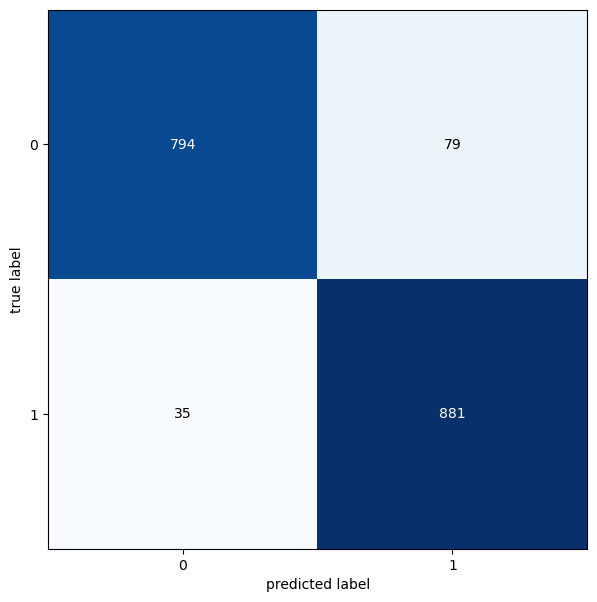

In [311]:
from torchmetrics import ConfusionMatrix
# plot_confusion_matrix will plot the metrix in a nicer way
from mlxtend.plotting import plot_confusion_matrix

model_0.eval()
test_loss, test_accuracy= 0, 0
with torch.inference_mode():
    X= inputs_tensor_test.to(device)
    y= targets_tensor_test.to(device)

    # Predict for test data
    test_logits= model_0(X).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))
    
    # Calculate test loss/accuracy
    test_loss+= loss_fn(test_logits, y)
    test_accuracy+= accuracy_fn(test_pred, y)

print(f"After training results: Test loss: {test_loss:.5f} Test acc: {test_accuracy*100:.2f}%")

confmat= ConfusionMatrix(task='binary')

# test_data.targets are the values we want to predict in the test dataloader
confmat_tensor= confmat(
  preds= test_pred.cpu(),
  target= targets_tensor_test.cpu())

# Plot the confusion matrix
fig, ax= plot_confusion_matrix(
  conf_mat= confmat_tensor.numpy(),
  figsize= (10, 7)
)


In [180]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary  


In [292]:
summary(model_0, input_size=[len(signal_windows)])

Layer (type:depth-idx)                   Output Shape              Param #
StockModelBinaryV0                       [1]                       --
├─Sequential: 1-1                        [1]                       --
│    └─Linear: 2-1                       [192]                     3,264
│    └─LeakyReLU: 2-2                    [192]                     --
│    └─Linear: 2-3                       [96]                      18,528
│    └─LeakyReLU: 2-4                    [96]                      --
│    └─Linear: 2-5                       [48]                      4,656
│    └─LeakyReLU: 2-6                    [48]                      --
│    └─Linear: 2-7                       [12]                      588
│    └─LeakyReLU: 2-8                    [12]                      --
│    └─Linear: 2-9                       [1]                       13
Total params: 27,049
Trainable params: 27,049
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.64
Input size (MB): 0.00
Forward/back

In [297]:
from pathlib import Path

# Create directory, if it doesn't exist, to store models
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create path to the model
MODEL_NAME= "2023-12-11-DNA-from20210101-to20231111-in16-hid12-result9361pct.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(
  obj=model_0.state_dict(),
  f=MODEL_SAVE_PATH)

In [300]:
loaded_model_0 = StockModelBinaryV0(16, 12)
# Created a model from same class and since load_state_dict() is method from nn.Module it can be called to populate the state
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.to(device)

StockModelBinaryV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=16, out_features=192, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=192, out_features=96, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=96, out_features=48, bias=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=48, out_features=12, bias=True)
    (7): LeakyReLU(negative_slope=0.1)
    (8): Linear(in_features=12, out_features=1, bias=True)
  )
)

In [309]:
loaded_model_0.eval()
test_loss, test_accuracy= 0, 0
with torch.inference_mode():
    for X, y in test_dataloader:
        X= X.to(device)
        y= y.to(device)
    
        # Predict for test data
        test_logits= loaded_model_0(X).squeeze()
        test_pred= torch.round(torch.sigmoid(test_logits))
        
        # Calculate test loss/accuracy
        test_loss+= loss_fn(test_logits, y)
        test_accuracy+= accuracy_fn(test_pred, y)

    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)

print(f"After loading results: Test loss: {test_loss:.5f} Test acc: {test_accuracy*100:.2f}%")


After loading results: Test loss: 0.24286 Test acc: 91.89%
